In [1]:
import json

# Load the original JSON file
with open("estonian_restaurant_reviews_test_sample_annotation.json", "r", encoding="utf-8") as file:
    data = json.load(file)

# Prepare the output list
output = []

# Iterate through reviews
for review in data:
    review_text = review["data"]["review_text"]
    annotation = review["annotations"][0]["result"]

    # Extract relations between aspects and opinions (there can be multiple relations for one aspect!)
    relations = []
    for item in annotation:
        if item["type"] == "relation":
            from_id = item["from_id"]
            to_id = item["to_id"]
            polarity = item["labels"][0].lower()
            relations.append({
                "from_id": from_id,
                "to_id": to_id,
                "polarity": polarity
            })

    # Collect terms
    aspect_terms = {
        item["id"]: item["value"]
        for item in annotation
        if "value" in item and "Aspect term" in item["value"]["labels"]
    }
    opinion_terms = {
        item["id"]: item["value"]
        for item in annotation
        if "value" in item and "Opinion term" in item["value"]["labels"]
    }

    # Create reverse lookup dictionaries for convenience
    aspects_by_id = {aspect_id: aspect_value for aspect_id, aspect_value in aspect_terms.items()}
    opinions_by_id = {opinion_id: opinion_value for opinion_id, opinion_value in opinion_terms.items()}

    # Iterate through relations and collect all pairs (aspect -> opinion, polarity)
    aspects = []
    for relation in relations:
        from_id = relation["from_id"]
        to_id = relation["to_id"]
        polarity = relation["polarity"]

        # Aspect -> Opinion (direct relation)
        if from_id in aspects_by_id and to_id in opinions_by_id:
            aspect_value = aspects_by_id[from_id]
            opinion_value = opinions_by_id[to_id]

            aspects.append({
                "aspect term": {
                    "start": aspect_value["start"],
                    "end": aspect_value["end"],
                    "text": aspect_value["text"]
                },
                "opinion term": {
                    "start": opinion_value["start"],
                    "end": opinion_value["end"],
                    "text": opinion_value["text"]
                },
                "polarity": polarity
            })

        # Opinion -> Aspect (reverse relation, if it exists)
        elif from_id in opinions_by_id and to_id in aspects_by_id:
            aspect_value = aspects_by_id[to_id]
            opinion_value = opinions_by_id[from_id]

            aspects.append({
                "aspect term": {
                    "start": aspect_value["start"],
                    "end": aspect_value["end"],
                    "text": aspect_value["text"]
                },
                "opinion term": {
                    "start": opinion_value["start"],
                    "end": opinion_value["end"],
                    "text": opinion_value["text"]
                },
                "polarity": polarity
            })

    output.append({
        "review_text": review_text,
        "aspects": aspects
    })

# Save the transformed JSON file
with open("output_corrected.json", "w", encoding="utf-8") as file:
    json.dump(output, file, indent=4, ensure_ascii=False)

print("Processing complete. Output saved to output_corrected.json.")

Processing complete. Output saved to output_corrected.json.


In [2]:
# Load the original JSON file with val sample annotation
with open("estonian_restaurant_reviews_val_sample_annotation.json", "r", encoding="utf-8") as file:
    data = json.load(file)

# Prepare the output list
output = []

# Iterate through reviews
for review in data:
    review_text = review["data"]["review_text"]
    annotation = review["annotations"][0]["result"]

    # Extract relations between aspects and opinions (there can be multiple relations for one aspect!)
    relations = []
    for item in annotation:
        if item["type"] == "relation":
            from_id = item["from_id"]
            to_id = item["to_id"]
            polarity = item["labels"][0].lower()
            relations.append({
                "from_id": from_id,
                "to_id": to_id,
                "polarity": polarity
            })

    # Collect terms
    aspect_terms = {
        item["id"]: item["value"]
        for item in annotation
        if "value" in item and "Aspect term" in item["value"]["labels"]
    }
    opinion_terms = {
        item["id"]: item["value"]
        for item in annotation
        if "value" in item and "Opinion term" in item["value"]["labels"]
    }

    # Create reverse lookup dictionaries for convenience
    aspects_by_id = {aspect_id: aspect_value for aspect_id, aspect_value in aspect_terms.items()}
    opinions_by_id = {opinion_id: opinion_value for opinion_id, opinion_value in opinion_terms.items()}

    # Iterate through relations and collect all pairs (aspect -> opinion, polarity)
    aspects = []
    for relation in relations:
        from_id = relation["from_id"]
        to_id = relation["to_id"]
        polarity = relation["polarity"]

        # Aspect -> Opinion (direct relation)
        if from_id in aspects_by_id and to_id in opinions_by_id:
            aspect_value = aspects_by_id[from_id]
            opinion_value = opinions_by_id[to_id]

            aspects.append({
                "aspect term": {
                    "start": aspect_value["start"],
                    "end": aspect_value["end"],
                    "text": aspect_value["text"]
                },
                "opinion term": {
                    "start": opinion_value["start"],
                    "end": opinion_value["end"],
                    "text": opinion_value["text"]
                },
                "polarity": polarity
            })

        # Opinion -> Aspect (reverse relation, if it exists)
        elif from_id in opinions_by_id and to_id in aspects_by_id:
            aspect_value = aspects_by_id[to_id]
            opinion_value = opinions_by_id[from_id]

            aspects.append({
                "aspect term": {
                    "start": aspect_value["start"],
                    "end": aspect_value["end"],
                    "text": aspect_value["text"]
                },
                "opinion term": {
                    "start": opinion_value["start"],
                    "end": opinion_value["end"],
                    "text": opinion_value["text"]
                },
                "polarity": polarity
            })

    output.append({
        "review_text": review_text,
        "aspects": aspects
    })

# Save the transformed JSON file
with open("output_val.json", "w", encoding="utf-8") as file:
    json.dump(output, file, indent=4, ensure_ascii=False)

print("Processing complete. Output saved to output_val.json.")

Processing complete. Output saved to output_val.json.


In [5]:
!pip install estnltk==1.7.4


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import estnltk
from estnltk import Text
from estnltk.taggers import SentenceTokenizer
from estnltk.taggers import WordTagger
import string
import random
# import nltk
# nltk.download('punkt')
# nltk.download('punkt_tab')
# from nltk.tokenize import word_tokenize, sent_tokenize

In [7]:
# Load JSON data
with open("output_corrected.json", "r", encoding="utf-8") as f:
    data = json.load(f)

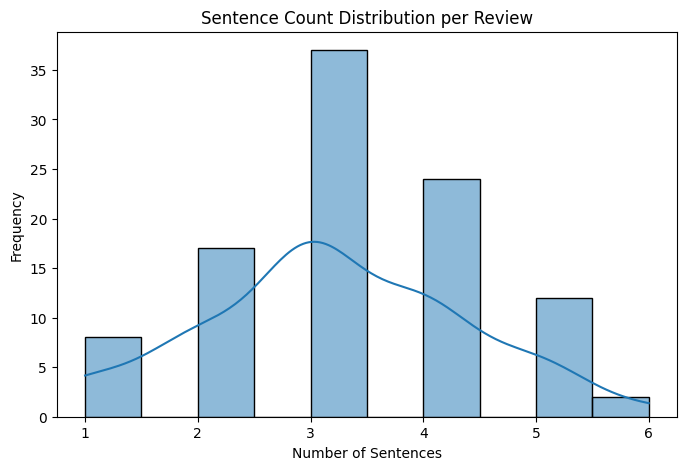

In [8]:
# 1. Distribution of sentence count per review
def count_sentences(text):
    """Based on the instruction: https://github.com/estnltk/estnltk/blob/main/tutorials/nlp_pipeline/A_text_segmentation/04_sentences.ipynb"""
    text = Text(text)
    text.tag_layer(['words'])
    SentenceTokenizer().tag(text)
    return len(text['sentences'])

sentence_counts = [count_sentences(review["review_text"]) for review in data]
plt.figure(figsize=(8, 5))
sns.histplot(sentence_counts, bins=10, kde=True)
plt.xlabel("Number of Sentences")
plt.ylabel("Frequency")
plt.title("Sentence Count Distribution per Review")
plt.show()

Most often, the review text contains 3 sentences.

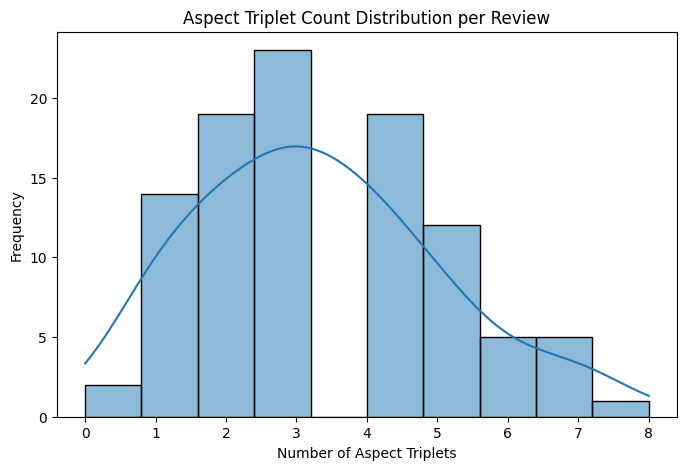

In [9]:
# 2. Distribution of aspect triplet count per review
triplet_counts = [len(review["aspects"]) for review in data]
plt.figure(figsize=(8, 5))
sns.histplot(triplet_counts, bins=10, kde=True)
plt.title("Aspect Triplet Count Distribution per Review")
plt.xlabel("Number of Aspect Triplets")
plt.ylabel("Frequency")
plt.show()

Most often, the review text contains 3 aspect triplets.

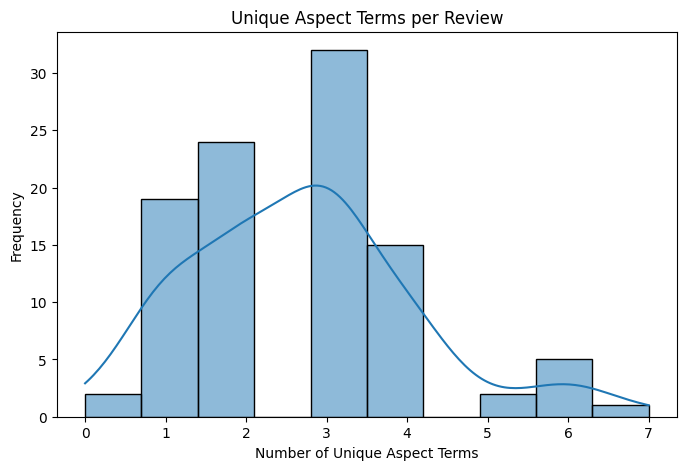

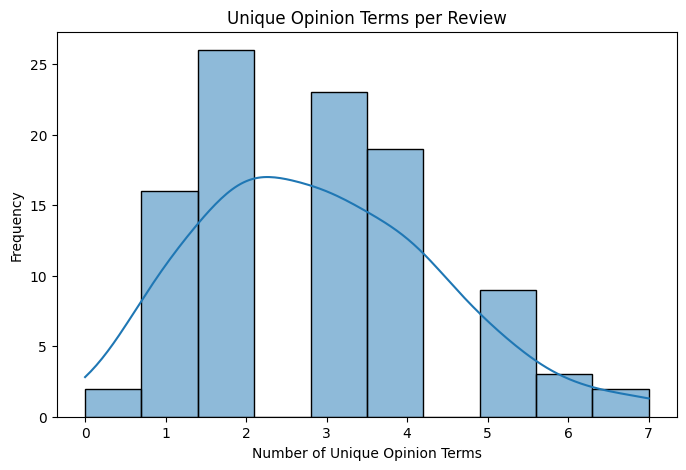

In [10]:
# 3. Unique aspect and opinion terms per review
unique_aspect_counts = []
unique_opinion_counts = []

for review in data:
    aspect_terms = set(aspect["aspect term"]["text"] for aspect in review["aspects"])
    opinion_terms = set(aspect["opinion term"]["text"] for aspect in review["aspects"])
    unique_aspect_counts.append(len(aspect_terms))
    unique_opinion_counts.append(len(opinion_terms))

plt.figure(figsize=(8, 5))
sns.histplot(unique_aspect_counts, bins=10, kde=True)
plt.title("Unique Aspect Terms per Review")
plt.xlabel("Number of Unique Aspect Terms")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(unique_opinion_counts, bins=10, kde=True)
plt.title("Unique Opinion Terms per Review")
plt.xlabel("Number of Unique Opinion Terms")
plt.ylabel("Frequency")
plt.show()

The number of opinion terms per review may be less than the number of aspect terms per review, as one opinion may relate to several aspect terms (for example "suurepärane toit ja teenindus").

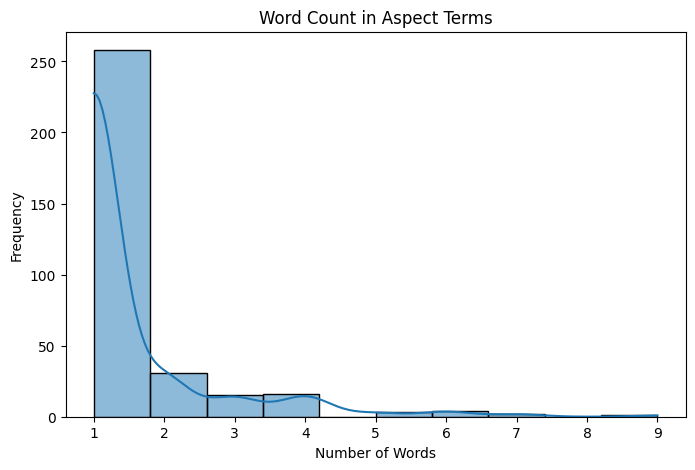

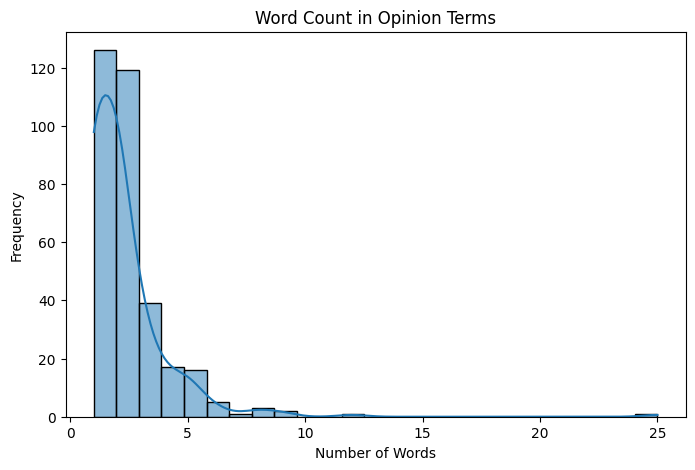

In [11]:
# 4. Word count distribution in aspect and opinion terms
def count_words(text):
    """Based on the instruction: https://github.com/estnltk/estnltk/blob/main/tutorials/nlp_pipeline/A_text_segmentation/03_words.ipynb"""
    # Prepare text: add tokens and compound tokens
    text = Text(text)
    text.tag_layer(['tokens', 'compound_tokens'])
    # Add words
    WordTagger().tag(text)
    return len(text['words'])

aspect_word_counts = [count_words(aspect["aspect term"]["text"]) for review in data for aspect in review["aspects"]]
opinion_word_counts = [count_words(aspect["opinion term"]["text"]) for review in data for aspect in review["aspects"]]

plt.figure(figsize=(8, 5))
sns.histplot(aspect_word_counts, bins=10, kde=True)
plt.title("Word Count in Aspect Terms")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(opinion_word_counts, bins=25, kde=True)
plt.title("Word Count in Opinion Terms")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

Most often, an aspect term consists of 1 word, an opinion term consists of 1-2 words, while opinion terms may be longer than aspect terms.

In [12]:
# 5. Unique words in aspect and opinion terms
def lemmatize(text):
    """Based on the instruction: https://github.com/estnltk/estnltk/blob/main/tutorials/basics/introduction_to_nlp_pipeline.ipynb"""
    text = Text(text).tag_layer()
    return [lemmas_list[0] for lemmas_list in list(text.words.lemma) if lemmas_list[0] not in string.punctuation]

all_aspect_words = []
all_opinion_words = []

for review in data:
    for aspect in review["aspects"]:
        all_aspect_words.extend(lemmatize(aspect["aspect term"]["text"]))
        all_opinion_words.extend(lemmatize(aspect["opinion term"]["text"]))

print(f"Total unique aspect words per 100 reviews: {len(set(all_aspect_words))}")
print(f"Total unique opinion words per 100 reviews: {len(set(all_opinion_words))}")

Total unique aspect words per 100 reviews: 202
Total unique opinion words per 100 reviews: 348


In [116]:
random.sample(list(set(all_aspect_words)), 5)

['laps', 'terrass', 'keskel', 'teine', 'liha']

In [117]:
random.sample(list(set(all_opinion_words)), 5)

['tegema', 'tähelepanelikkus', 'süda', 'pöörama', 'südantsoojendav']

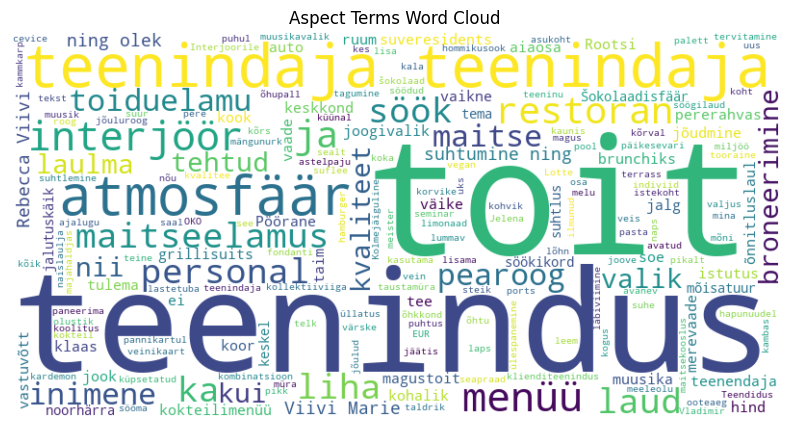

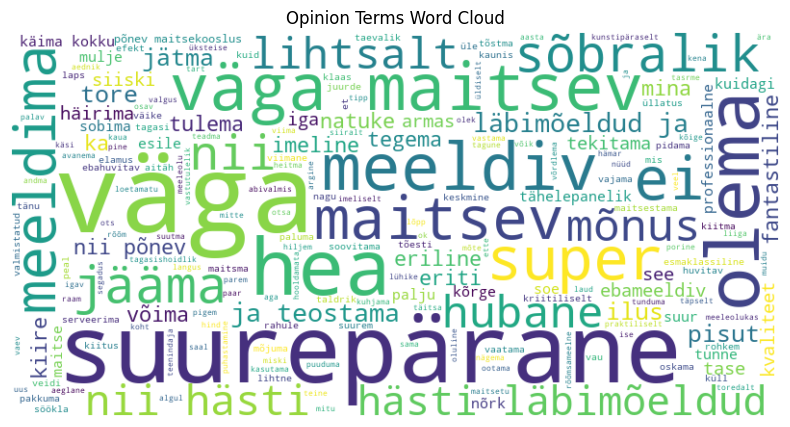

In [13]:
# 6. Word clouds for aspect and opinion terms
aspect_text = " ".join(all_aspect_words)
opinion_text = " ".join(all_opinion_words)

wordcloud_aspect = WordCloud(width=800, height=400, background_color="white").generate(aspect_text)
wordcloud_opinion = WordCloud(width=800, height=400, background_color="white").generate(opinion_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_aspect, interpolation="bilinear")
plt.axis("off")
plt.title("Aspect Terms Word Cloud")
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_opinion, interpolation="bilinear")
plt.axis("off")
plt.title("Opinion Terms Word Cloud")
plt.show()

In [15]:
# 7. Top-5 most frequent lemmatized aspect and opinion terms
aspect_freq = Counter(all_aspect_words)
opinion_freq = Counter(all_opinion_words)

print("Top 5 most frequent aspect terms:")
print(aspect_freq.most_common(5))

print("Top 5 most frequent opinion terms:")
print(opinion_freq.most_common(5))

Top 5 most frequent aspect terms:
[('toit', 62), ('teenindus', 48), ('teenindaja', 35), ('atmosfäär', 15), ('menüü', 7)]
Top 5 most frequent opinion terms:
[('väga', 49), ('suurepärane', 27), ('maitsev', 22), ('hea', 17), ('nii', 17)]


Сopula verbs (forms of the verb olema 'to be') adjacent to the opinion terms were not annotated, but they could be inside (in the middle) of the opinion term (for example: võiks olla suurem 'could be bigger', referring to a children's play area).